# Predicting California Housing Prices

## Reading the data and a bird's eye view of it

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv(r'housing.csv')  # read the csv file

In [3]:
housing.head()  # First 5 values of each column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()  # no. of non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can observe that the attribute "total_bedrooms" has (20640-20433)=207 missing values.

In [5]:
housing["ocean_proximity"].value_counts()  # Diff. values taken by ocean_proximity and their counts

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()  # Few characteristics of number-type columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


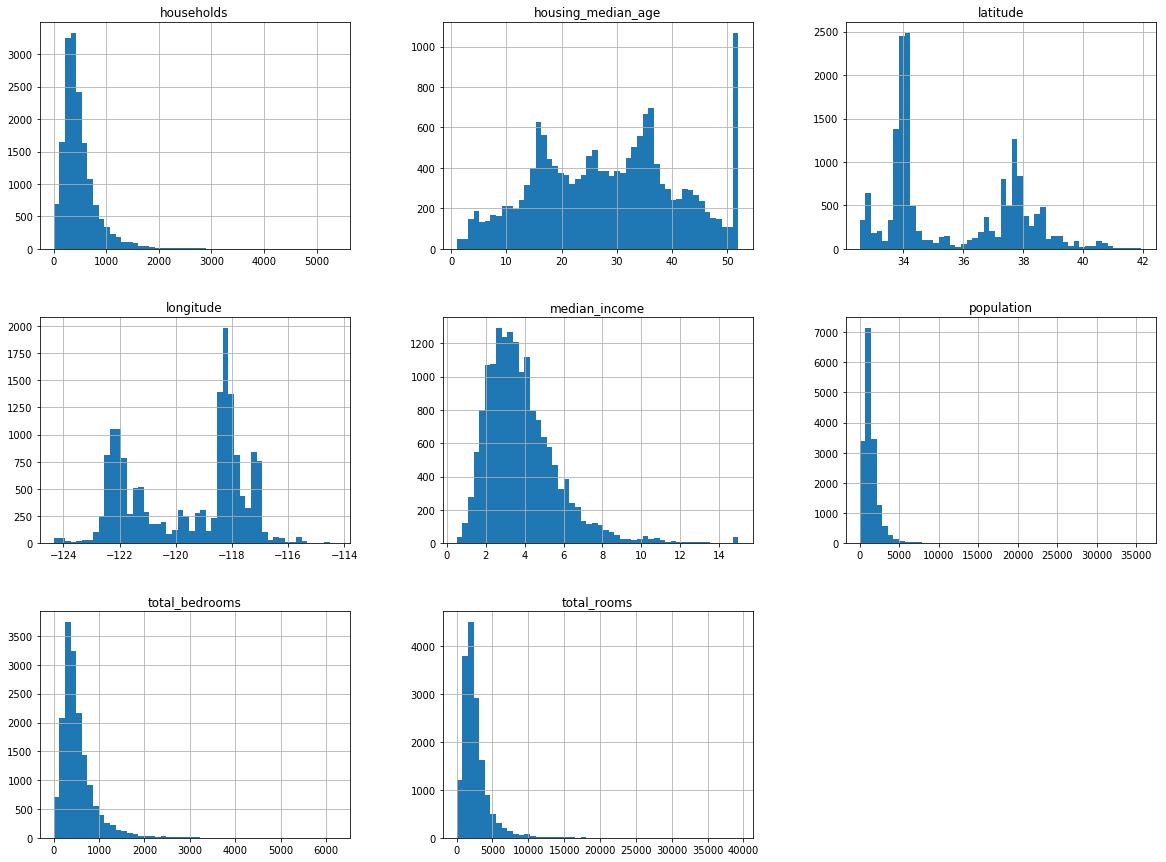

In [87]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()                                # Observe the distribution of values for each attribute

## Split the data into a test set and a train set

In [8]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,random_state=42,test_size=0.2)  # Test-20% and Train-80%

In [9]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


###### The above split is a random split. Instead, if we want to divide the samples such that a particular attribute, say 'Median Income', maintains its ratio in both the sets, we can perform a stratified split. (to avoid sampling bias)

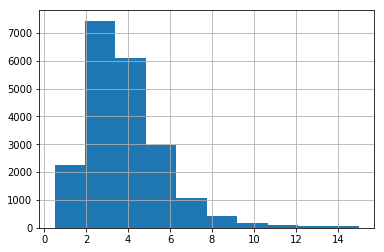

In [10]:
housing["median_income"].hist()

###### Median Income is a continuous-valued attribute. We first need to make it discrete.

We need to divide the 'median income' attribute into representative bins of almost same no. of samples in them.
All values are divided by 1.5 to reduce the range of values. All the values above 5 are put in the bin 5 i.e, the 5th bin has all the values which are greater than or equal to 5. (after dividing by 1.5)

In [11]:
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"]/1.5)         # Divide all values by 1.5
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True) # The 5th bin is adjusted to maintain comparable sizes

In [12]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

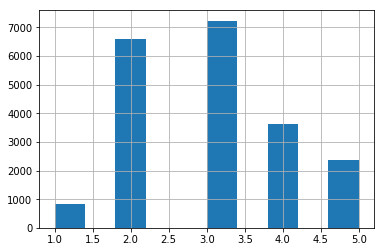

In [13]:
housing["income_cat"].hist()

Split the set maintaining ratios of number of values for each category of Median Income:

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

sp = StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
for train_index,test_index in sp.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

The ratio in each category of median income is maintained in both the train and test sets just like the original set.

In [15]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Now, we can drop the Income Category columns which we had created.

In [18]:
strat_train_set.drop(columns=["income_cat"],inplace=True)
strat_test_set.drop(columns=["income_cat"],inplace=True)
print(list(strat_train_set),list(strat_test_set),sep='\n')

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


## Visualizing the data

In [19]:
housing = strat_train_set.copy()  # Create a copy of the data

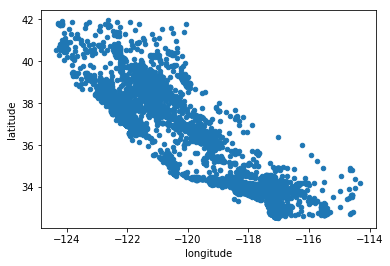

In [20]:
housing.plot(kind="scatter",x="longitude",y="latitude")

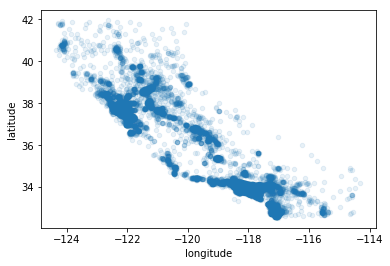

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)  # Add transparency to observe the concentration of points

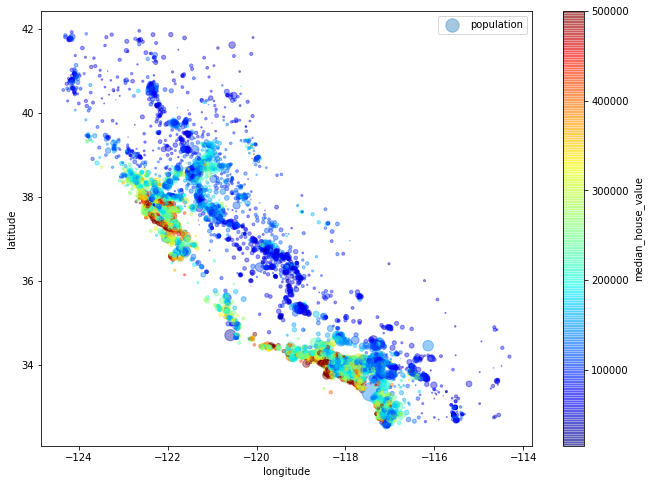

In [22]:
housing.plot(kind="scatter",alpha=0.4,x="longitude",y="latitude",s=housing["population"]/100,c="median_house_value",
             label="population",figsize=(11,8),cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend()  # For each circle, radius is proportional to the population

In [23]:
corr_matrix = housing.corr()
print(corr_matrix)             # Correlation Matrix

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)  # Correlation of House Value with other attributes

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027250E17B00>,
      dtype=object)

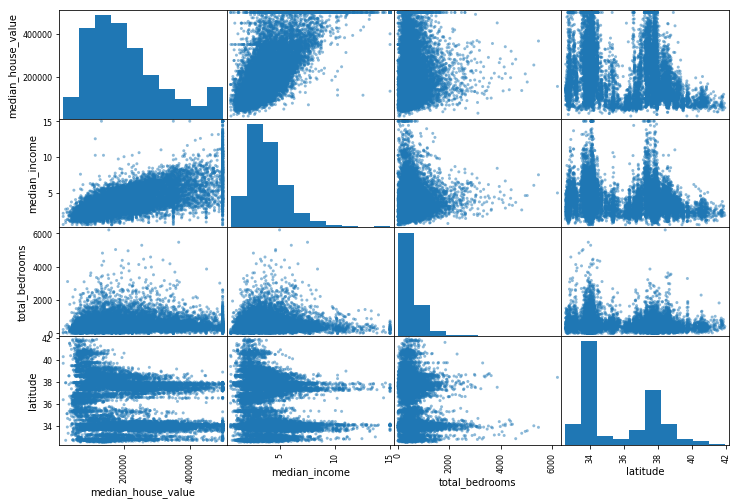

In [25]:
from pandas.plotting import scatter_matrix

attr = ["median_house_value","median_income","total_bedrooms","latitude"]

scatter_matrix(housing[attr],figsize=(12,8))       # If both attributes are same, histogram is plotted (Diagonal)

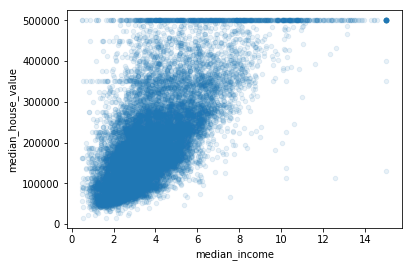

In [26]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)  

We can observe that they are stongly correlated. The points are not too dispersed. Instead, a linear trend is observed.

## Experimenting with Combinations of Attributes

In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]  # Add a few extra attributes

In [28]:
housing.corr()["median_house_value"].sort_values(ascending=False)  # Compute the new correlation matrix

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

We can observe that the new attribute "bedrooms_per_room" appears to be strongly correlated(negatively) with the target attribute.

## Preparing the data for ML Algorithms

In [29]:
housing = strat_train_set.drop("median_house_value",axis=1) # Create a copy of train set without the target attribute
housing_labels = strat_train_set["median_house_value"].copy() # Copy of the target attribute

### Handling Missing Values 

In [30]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")  # Create an instance of Imputer

The Imputer can only be applied on numerical attributes. So, we need to select such attributes and then fit the Imputer.

In [31]:
housing_num = housing.select_dtypes(include=[np.number])  # Selects numerical attributes

In [32]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [33]:
imputer.fit(housing_num)  # Fit the Imputer

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

What we mean by 'fitting' the imputer is nothing but computing the median value of each attribute and storing it.

In [34]:
imputer.statistics_       # Median of each numerical attribute

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
housing_num.median().values  # Verification

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
X = imputer.transform(housing_num)  # Replace the missing values with the corresponding median

In [37]:
type(X)

numpy.ndarray

We can see that the output is a numpy array. We can convert it to a dataframe.

In [38]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Handling Categorical Attributes

In [39]:
housing_cat = housing[["ocean_proximity"]]

In [40]:
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


We can assign a number to each category of the attribute.

In [41]:
from future_encoders import OrdinalEncoder

In [42]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]                 

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Well, this seems like an easy way out, doesn't it? Not quite. <br>
The problem with this approach is that ML algos might assume that two nearby values are more similar than two distant values. But, this might not be the case always.<br>
Instead, we come up with another technique called One-Hot Encoding.<br>
We add one column for each category and the respective entry is 1 if that category is present in that particular training example, else it's set to 0.

In [44]:
from future_encoders import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)                  # Set to True if sparse matrix is needed
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can create a simple transformer class which adds the required combined attributes.

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin          

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):              # A simple transformer class
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]                                  # Add all 3 custom attr.
        else:
            return np.c_[X, rooms_per_household, population_per_household]   # Exclude bedrooms_per_room

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)            # Toggle between true or false to try out which one works better
housing_extra_attribs = attr_adder.transform(housing.values)

We create a 'pipeline' which applies transformations to the data in sequence.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', MinMaxScaler()),             # A Standard Scaler can also be used instead of a Min-Max Scaler
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

We took care about the numerical attributes. We now need to transform categorical attributes.

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

# Creating a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values           # Returns the columns with names present in 'attribute_names'

In [48]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])                                                  # Pipeline for numerical attr.

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])                                                  # Pipeline for categorical attr.

We can combine both the pipelines by using 'FeatureUnion' class.<br>
It runs both the pipelines parallely and then concatenates them.

In [49]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [50]:
housing_prepared = full_pipeline.fit_transform(housing) # Applying the FeatureUnion (both the pipelines)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [51]:
housing_prepared.shape

(16512, 16)

## Applying ML Algorithms, the exciting part:)

### Linear Regression 

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(lin_reg.predict(some_data_prepared))                     # Testing it on some part of training set
print(list(some_labels))                                  

[210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let's use Root Mean Square as the evaluation metric for our algorithms.

In [54]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)                                                 # RMSE of Linear Regression

68628.19819848923


### Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

dec_reg = DecisionTreeRegressor(random_state = 42)
dec_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [56]:
housing_predictions = dec_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)                                                # RMSE of Decision Tree Regressor

0.0


We found the best model for our dataset. Didn't we?<br>
Possibly not.<br>
We might have overfit the training set which could affect the performance of our model on test data.<br>
Let's use cross-validation score as the metric to observe if we have overfit the training data.

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dec_reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print(scores,scores.mean(),scores.std(),sep='\n')          # A utility function to display scores

In [59]:
display_scores(tree_rmse_scores)                               # Cross-validation scores for DTR

[70232.0136482  66828.46839892 72444.08721003 70761.50186201
 71125.52697653 75581.29319857 70169.59286164 70055.37863456
 75370.49116773 71222.39081244]
71379.07447706361
2458.3188204349362


In [60]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [61]:
display_scores(lin_rmse_scores)                                # Cross-validation scores for LR

[66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
69052.46136345083
2731.6740017983466


Surprisingly, Linear Regression performs better than the Decision Tree Regressor(DTR). This is because the DTR model overfit our training set.

### Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

rand_for = RandomForestRegressor(random_state=42)
rand_for.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [63]:
housing_predictions = rand_for.predict(housing_prepared)
rand_for_mse = mean_squared_error(housing_labels,housing_predictions)
rand_for_rmse = np.sqrt(rand_for_mse)
print(rand_for_rmse)                                            # RMSE of RFR

21941.911027380233


In [64]:
rand_for_scores = cross_val_score(rand_for,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rand_for_rmse_scores = np.sqrt(-rand_for_scores)

In [65]:
display_scores(rand_for_rmse_scores)                            # Cross-validation score of RFR

[51650.94405471 48920.80645498 52979.16096752 54412.74042021
 50861.29381163 56488.55699727 51866.90120786 49752.24599537
 55399.50713191 53309.74548294]
52564.19025244012
2301.873803919754


### Support Vector Regressor

In [66]:
from sklearn.svm import SVR

sv_mac = SVR(kernel='linear')
sv_mac.fit(housing_prepared,housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
housing_predictions = sv_mac.predict(housing_prepared)
sv_mac_mse = mean_squared_error(housing_labels,housing_predictions)
sv_mac_rmse = np.sqrt(sv_mac_mse)
print(sv_mac_rmse)                                                   # RMSE of SVR

111094.6308539982


In [68]:
sv_mac_scores = cross_val_score(sv_mac,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
sv_mac_rmse_scores = np.sqrt(-sv_mac_scores)

In [69]:
display_scores(sv_mac_rmse_scores)                                   # Cross-validation score of SVR

[105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
111809.84009600841
2762.393664321567


### XGBoost Regressor

In [70]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(housing_prepared,housing_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
housing_predictions = xgb.predict(housing_prepared)
xgb_mse = mean_squared_error(housing_labels,housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)                                                   # RMSE of XGBR

50467.191745053715


In [72]:
xgb_scores = cross_val_score(xgb,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)

In [73]:
display_scores(xgb_rmse_scores)                                   # Cross-validation score of XGBR

[52056.36777099 49897.25202193 52875.58279806 55219.63304289
 53215.38148905 56019.44318581 50929.49959547 50775.14967982
 56506.79613124 53597.20486028]
53109.231057552926
2153.951090593369


### Multi-layer Perceptron Regressor

In [74]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9,9,9), random_state=42)
nn.fit(housing_prepared,housing_labels)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [75]:
housing_predictions = nn.predict(housing_prepared)
nn_mse = mean_squared_error(housing_labels,housing_predictions)
nn_rmse = np.sqrt(nn_mse)
print(nn_rmse)                                                     # RMSE of MLPR

56351.76908734168


In [76]:
nn_scores = cross_val_score(nn,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
nn_rmse_scores = np.sqrt(-nn_scores)

In [77]:
display_scores(nn_rmse_scores)                                     # Cross-validation score of MLPR

[58374.05558363 56524.72603907 58153.53523    59294.06296872
 57329.31802429 58863.74890634 55440.122662   54346.1513678
 59449.60777549 57692.02855465]
57546.73571119987
1589.2043647870469


We shortlist two best models namely the Random Forest Regressor and the XGBoost Regressor.

## Fine-tuning our model

### Grid-Search

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [4, 6, 8, 10], 'max_depth': [10,50,100]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [3, 4, 5]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)                  # Fine-tuning RFR

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 50], 'max_features': [4, 6, 8, 10], 'max_depth': [10, 50, 100]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [79]:
grid_search.best_estimator_                                       # Optimal set of hyperparameter values for RFR

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [80]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060016,0.002389,0.001487,4.523674e-07,10,4,3,NaN,"{'max_depth': 10, 'max_features': 4, 'n_estima...",-3.266484e+09,...,-3.492390e+09,1.608957e+08,53,-2.502333e+09,-2.397927e+09,-2.581047e+09,-2.604390e+09,-2.372012e+09,-2.491542e+09,9.371580e+07
1,0.234807,0.032130,0.004072,3.787477e-04,10,4,10,NaN,"{'max_depth': 10, 'max_features': 4, 'n_estima...",-2.793167e+09,...,-3.008458e+09,1.353847e+08,42,-2.033043e+09,-2.022311e+09,-2.021916e+09,-2.098941e+09,-1.984523e+09,-2.032147e+09,3.723347e+07
2,0.591922,0.050522,0.010614,6.724628e-04,10,4,30,NaN,"{'max_depth': 10, 'max_features': 4, 'n_estima...",-2.669760e+09,...,-2.876078e+09,1.601318e+08,38,-1.946812e+09,-1.907171e+09,-1.890353e+09,-1.923394e+09,-1.889118e+09,-1.911369e+09,2.170358e+07
3,0.931890,0.047445,0.018345,1.078196e-03,10,4,50,NaN,"{'max_depth': 10, 'max_features': 4, 'n_estima...",-2.631730e+09,...,-2.850024e+09,1.621232e+08,37,-1.912853e+09,-1.855010e+09,-1.858301e+09,-1.903633e+09,-1.850873e+09,-1.876134e+09,2.648352e+07
4,0.074512,0.002075,0.001581,2.029505e-04,10,6,3,NaN,"{'max_depth': 10, 'max_features': 6, 'n_estima...",-2.964200e+09,...,-3.247679e+09,2.621684e+08,43,-2.070540e+09,-2.023160e+09,-2.139570e+09,-2.115110e+09,-2.062143e+09,-2.082105e+09,4.098377e+07
5,0.251175,0.005589,0.003670,2.434374e-04,10,6,10,NaN,"{'max_depth': 10, 'max_features': 6, 'n_estima...",-2.657956e+09,...,-2.900527e+09,1.961292e+08,39,-1.842762e+09,-1.830909e+09,-1.934213e+09,-1.855700e+09,-1.837905e+09,-1.860298e+09,3.783453e+07
6,0.774751,0.020147,0.011607,2.381373e-03,10,6,30,NaN,"{'max_depth': 10, 'max_features': 6, 'n_estima...",-2.634782e+09,...,-2.815268e+09,1.524754e+08,36,-1.814678e+09,-1.764487e+09,-1.761764e+09,-1.803197e+09,-1.770790e+09,-1.782983e+09,2.169876e+07
7,1.267482,0.016153,0.017168,2.353635e-04,10,6,50,NaN,"{'max_depth': 10, 'max_features': 6, 'n_estima...",-2.610685e+09,...,-2.789065e+09,1.568903e+08,34,-1.792992e+09,-1.741745e+09,-1.745159e+09,-1.788201e+09,-1.764404e+09,-1.766500e+09,2.119135e+07
8,0.099106,0.001927,0.001582,1.853280e-04,10,8,3,NaN,"{'max_depth': 10, 'max_features': 8, 'n_estima...",-3.110091e+09,...,-3.334677e+09,2.361674e+08,46,-2.127604e+09,-2.115540e+09,-2.155910e+09,-2.191569e+09,-2.041246e+09,-2.126374e+09,4.997684e+07
9,0.327948,0.002209,0.003869,1.971729e-04,10,8,10,NaN,"{'max_depth': 10, 'max_features': 8, 'n_estima...",-2.712805e+09,...,-2.917585e+09,1.977131e+08,40,-1.826279e+09,-1.855385e+09,-1.847979e+09,-1.861999e+09,-1.787856e+09,-1.835900e+09,2.686074e+07


In [81]:
param_grid = [
    {'n_estimators': [10,50,100,150], 'max_depth' : [3,4,5,6,7]}
  ]

xgb_best = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_best, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)              # Fine-tuning XGBR

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100, 150], 'max_depth': [3, 4, 5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [82]:
grid_search.best_estimator_                                     # Optimal set of hyperparameter values for XGBR

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [83]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097717,0.002562,0.001599,0.000193,3,10,"{'max_depth': 3, 'n_estimators': 10}",-1.059703e+10,-1.122134e+10,-1.165054e+10,...,-1.127722e+10,4.229734e+08,20,-1.129960e+10,-1.120420e+10,-1.112273e+10,-1.124288e+10,-1.112469e+10,-1.119882e+10,6.842787e+07
1,0.424178,0.035967,0.004073,0.000195,3,50,"{'max_depth': 3, 'n_estimators': 50}",-3.020448e+09,-3.354703e+09,-3.419455e+09,...,-3.245070e+09,2.004620e+08,15,-3.127457e+09,-3.029886e+09,-3.048283e+09,-3.127872e+09,-2.994291e+09,-3.065558e+09,5.359915e+07
2,0.898156,0.067071,0.009125,0.001491,3,100,"{'max_depth': 3, 'n_estimators': 100}",-2.607844e+09,-2.937618e+09,-2.979566e+09,...,-2.831612e+09,1.899444e+08,13,-2.599842e+09,-2.536164e+09,-2.517361e+09,-2.620053e+09,-2.496585e+09,-2.554001e+09,4.779458e+07
3,1.207064,0.052627,0.012505,0.001187,3,150,"{'max_depth': 3, 'n_estimators': 150}",-2.471065e+09,-2.751978e+09,-2.814196e+09,...,-2.668240e+09,1.807824e+08,12,-2.362470e+09,-2.286061e+09,-2.277012e+09,-2.362100e+09,-2.268795e+09,-2.311287e+09,4.199603e+07
4,0.127867,0.002546,0.001688,0.000243,4,10,"{'max_depth': 4, 'n_estimators': 10}",-1.008976e+10,-1.075785e+10,-1.102946e+10,...,-1.074653e+10,4.140843e+08,19,-1.071920e+10,-1.060380e+10,-1.053202e+10,-1.066988e+10,-1.055239e+10,-1.061546e+10,7.042716e+07
5,0.546690,0.002204,0.005158,0.000243,4,50,"{'max_depth': 4, 'n_estimators': 50}",-2.651018e+09,-2.985789e+09,-3.001873e+09,...,-2.856274e+09,1.871570e+08,14,-2.615782e+09,-2.538418e+09,-2.526613e+09,-2.572652e+09,-2.492656e+09,-2.549224e+09,4.196869e+07
6,1.053607,0.004530,0.010509,0.000202,4,100,"{'max_depth': 4, 'n_estimators': 100}",-2.367498e+09,-2.632927e+09,-2.695368e+09,...,-2.541550e+09,1.775459e+08,10,-2.107378e+09,-2.075435e+09,-2.048147e+09,-2.077233e+09,-2.056259e+09,-2.072891e+09,2.051118e+07
7,3.603836,2.811527,0.040966,0.032886,4,150,"{'max_depth': 4, 'n_estimators': 150}",-2.240617e+09,-2.475761e+09,-2.554954e+09,...,-2.409387e+09,1.613155e+08,8,-1.833634e+09,-1.818589e+09,-1.785379e+09,-1.834747e+09,-1.796307e+09,-1.813731e+09,1.984355e+07
8,0.167449,0.005302,0.001885,0.000198,5,10,"{'max_depth': 5, 'n_estimators': 10}",-9.702625e+09,-1.042340e+10,-1.054712e+10,...,-1.033032e+10,3.943256e+08,18,-1.025999e+10,-1.012131e+10,-1.005196e+10,-1.014353e+10,-1.007147e+10,-1.012965e+10,7.303698e+07
9,0.716725,0.014354,0.007154,0.000258,5,50,"{'max_depth': 5, 'n_estimators': 50}",-2.429545e+09,-2.753548e+09,-2.819738e+09,...,-2.643283e+09,2.003605e+08,11,-2.193993e+09,-2.171315e+09,-2.115818e+09,-2.162153e+09,-2.124862e+09,-2.153628e+09,2.922993e+07


In [84]:
rand_for = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)                                 # Optimal model from Grid Search
rand_for.fit(housing_prepared,housing_labels)

housing_predictions = rand_for.predict(housing_prepared)
rand_for_mse = mean_squared_error(housing_labels,housing_predictions)
rand_for_rmse = np.sqrt(rand_for_mse)
print(rand_for_rmse)

rand_for_scores = cross_val_score(rand_for,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rand_for_rmse_scores = np.sqrt(-rand_for_scores)

display_scores(rand_for_rmse_scores)                                    # RMSE and CV-score

18573.46599475492
[48196.59576912 45762.76378562 48597.4706226  50978.34132824
 49358.87732432 52443.85972872 47674.24651133 46900.12499128
 51496.10844948 48866.07013944]
49027.44586501515
1989.9257008898637


In [85]:
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)                                         # Optimal model from Grid Search
xgb.fit(housing_prepared,housing_labels)

housing_predictions = xgb.predict(housing_prepared)
xgb_mse = mean_squared_error(housing_labels,housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

xgb_scores = cross_val_score(xgb,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)

display_scores(xgb_rmse_scores)                                         # RMSE and CV-score

27629.854140451873
[46544.94931277 43296.28499322 45582.45433785 47268.2655576
 45671.30375333 49439.41699535 44449.27479148 45796.5428196
 48862.96268788 46053.9129262 ]
46296.53681752546
1763.3428934076169


We observe that XGBR seems to be the better choice. (Lower CV mean)

## Evaluate the model on the test set

In [86]:
final_model = grid_search.best_estimator_                               # Optimal model from Grid Search (XGBR)                         

X_test = strat_test_set.drop("median_house_value",axis=1)               
y_test = strat_test_set["median_house_value"].copy()                    # Test Data

X_test_prepared = full_pipeline.transform(X_test)                       # Apply the required transformations
final_prediction = final_model.predict(X_test_prepared)                 # Predict

final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

print(final_rmse)                                                       # RMSE on test data

44825.73657106302


We could achieve a mean error of $44,825 on the test set.